In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [0]:
import h5py

In [0]:
svhn = h5py.File('/content/drive/My Drive/Colab Notebooks/dataset/SVHN_single_grey1.h5', 'r')

In [0]:
X_train = svhn['X_train'][:]
X_test = svhn['X_test'][:]
y_train = svhn['y_train'][:]
y_test = svhn['y_test'][:] 
svhn.close()

In [38]:
print("X_train shape: {0}".format(X_train.shape))
print("X_test shape: {0}".format(X_test.shape))
print("y_train shape: {0}".format(y_train.shape))
print("y_test shape: {0}".format(y_test.shape))

X_train shape: (42000, 32, 32)
X_test shape: (18000, 32, 32)
y_train shape: (42000,)
y_test shape: (18000,)


In [39]:
print("There are 42000 data points of shape 32*32 in training dataset.")
print("There are 18000 data points of shape 32*32 in testing dataset")

There are 42000 data points of shape 32*32 in training dataset.
There are 18000 data points of shape 32*32 in testing dataset


In [0]:
# Define a method to visualize datset 
import matplotlib.pyplot as plt
def visualize(X, columns=10, rows=10):
  fig=plt.figure(figsize=(8, 8))

  for i in range(1, columns*rows +1):
    img = X[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
  plt.show()

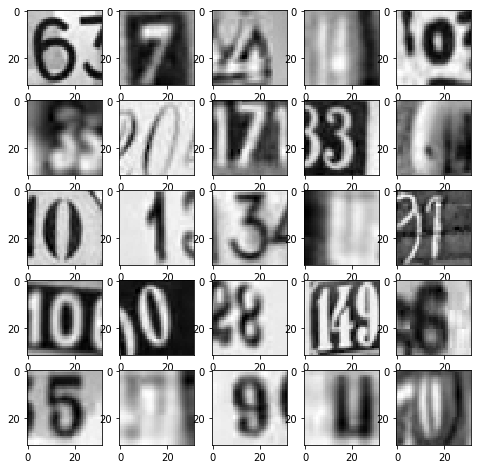

In [41]:
# Visualize Training Dataset
visualize(X_train, 5, 5)

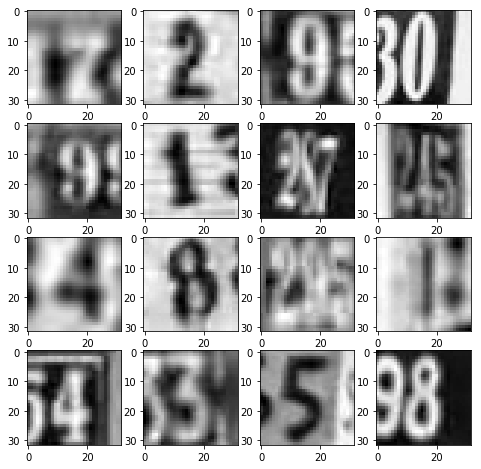

In [42]:
# Visualize Testing Dataset
visualize(X_test, 4, 4)

In [43]:
print(X_train.dtype)
print(X_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

float32
float32
uint8
uint8


### Resize all the train and test inputs to 28X28, to match with MNIST CNN model's input size

In [44]:
#Importing opencv module for the resizing function
import cv2

#Create a resized dataset for training and testing inputs with corresponding size. Here we are resizing it to 28X28 (same input size as MNIST)
X_train_res = np.zeros((X_train.shape[0],28,28), dtype=np.float32)
for i in range(X_train.shape[0]):
  #using cv2.resize to resize each train example to 28X28 size using Cubic interpolation
  X_train_res[i,:,:] = cv2.resize(X_train[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

X_test_res = np.zeros((X_test.shape[0],28,28), dtype=np.float32)
for i in range(X_test.shape[0]):
  #using cv2.resize to resize each test example to 28X28 size using Cubic interpolation
  X_test_res[i,:,:] = cv2.resize(X_test[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
  
# We don't need the original dataset anynmore so we can clear up memory consumed by original dataset
del X_train
del X_test

print(X_train_res.shape)
print(X_test_res.shape)

(42000, 28, 28)
(18000, 28, 28)


### Reshape train and test sets into shapes compatible with keras models

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28


#Keras expects data to be in the format (N_E.N_H,N_W,N_C)  N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
X_train = X_train_res.reshape(X_train_res.shape[0], img_rows, img_cols, 1)
X_test = X_test_res.reshape(X_test_res.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

### Pre-Processing the Dataset

In [46]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalizing the input
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

('X_train shape:', (42000, 28, 28, 1))
(42000, 'train samples')
(18000, 'test samples')


In [0]:
%tensorflow_version 2.x

In [0]:
#Importing important modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Building the CNN

In [0]:
#Initialize the model
model = Sequential()

# Normalize the data
model.add(BatchNormalization())

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,name='conv_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5,name='drop_1'))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5,name='drop_2'))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax',name='dense_2'))

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [53]:
#Training on the dataset
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
callback_list = [early_stopping]

model.fit(X_train, y_train,
          batch_size=128,
          epochs=32,
          verbose=1,
          validation_data=(X_test, y_test), callbacks=callback_list)

Train on 42000 samples, validate on 18000 samples
Epoch 1/32
42000/42000 [==============================] - 3s 71us/sample - loss: 1.0765 - accuracy: 0.6556 - val_loss: 0.5718 - val_accuracy: 0.8470
Epoch 2/32
42000/42000 [==============================] - 3s 61us/sample - loss: 0.6097 - accuracy: 0.8148 - val_loss: 0.4389 - val_accuracy: 0.8734
Epoch 3/32
42000/42000 [==============================] - 3s 62us/sample - loss: 0.5203 - accuracy: 0.8398 - val_loss: 0.4011 - val_accuracy: 0.8823
Epoch 4/32
42000/42000 [==============================] - 3s 62us/sample - loss: 0.4780 - accuracy: 0.8516 - val_loss: 0.3743 - val_accuracy: 0.8933
Epoch 5/32
42000/42000 [==============================] - 3s 61us/sample - loss: 0.4378 - accuracy: 0.8644 - val_loss: 0.3515 - val_accuracy: 0.9001
Epoch 6/32
42000/42000 [==============================] - 3s 61us/sample - loss: 0.4086 - accuracy: 0.8732 - val_loss: 0.3348 - val_accuracy: 0.9047
Epoch 7/32
42000/42000 [==============================] 

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch multiple                  4         
_________________________________________________________________
conv_1 (Conv2D)              multiple                  320       
_________________________________________________________________
conv_2 (Conv2D)              multiple                  18496     
_________________________________________________________________
max_1 (MaxPooling2D)         multiple                  0         
_________________________________________________________________
drop_1 (Dropout)             multiple                  0         
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                 

In [55]:
#Testing the model on test set
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

18000/18000 [==============================] - 1s 74us/sample - loss: 0.2960 - accuracy: 0.9219
('Test loss:', 0.29603474150598047)
('Test accuracy:', 0.92194444)


### Predicting 

Actual Image:


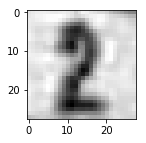

Prediction by the model:
2


In [28]:
print("Actual Image:")
plt.figure(figsize=(2,2))
plt.imshow(X_test[2].reshape(28,28),cmap="gray")
plt.show()

print("Prediction by the model:")
print(np.argmax(model.predict(X_test[2].reshape(1,28,28,1))))

In [27]:
print("We can see that model has accuratly detected the image")

We can see that model has accuratly detected the image


But since the test accuracy is around 92% hence there is a large scope of error. See below:

Actual Image:


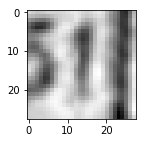

Prediction by the model:
1


In [31]:
print("But since the test accuracy is around 92% hence there is a large scope of error. See below:")
print("")
print("Actual Image:")
plt.figure(figsize=(2,2))
plt.imshow(X_test[33].reshape(28,28),cmap="gray")
plt.show()

print("Prediction by the model:")
print(np.argmax(model.predict(X_test[33].reshape(1,28,28,1))))

In [33]:
print("We can see it is 51 but model detected as 1.")
print("Here, model is not able to detect 5 before 1 completely due to error present in the model")

We can see it is 51 but model detected as 1.
Here, model is not able to detect 5 before 1 completely due to error present in the model
